In [123]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as smp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.float` is a deprecated alias

Gradient estimate is:  -0.5002963729275686
The estimate for the integral value is 537.2227634538344 with an error of 0.8441627156731871


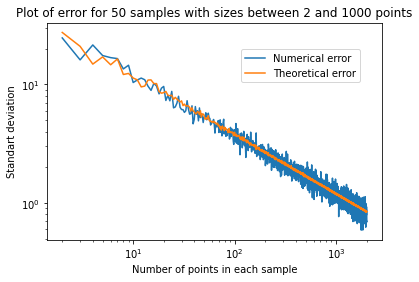

In [124]:
def generator(N):
  #A generator function which generates 100 8-dimensinal N points samples. 

  #Tensor of rank 3 containg 50, Npoints 8dimensional samples
  points = np.random.uniform(0.0, np.pi/8, (50, N, 8))

  #Finds the <f> over 50 samples each with N points
  f_average = 10**6 * np.sum(np.sum(np.sin(np.sum(points, 2)), 1)/50.0)/np.float(N)

  #Finds the average value of the integral
  int_average = f_average*((np.pi/8)**8)

  #Finds the average value of f^2
  f_average_squared =10**12 * np.sum(np.sum(np.sin(np.sum(points, 2))**2, 1)/50.0)/np.float(N)

  #Finds the standart deviation based on the formula and <f> and <f^2>
  std_theo = (np.pi/8)**8*((f_average_squared - f_average**2)/(np.float(N)))**0.5

  #Numerival standart deviation between the 50 samples
  std_num = np.std(10**6*(np.pi/8)**8*np.sum(np.sin(np.sum(points, 2)), 1)/(np.float(N)))

  return [int_average, std_theo, std_num]



#Define the samples so that the runtime is about a minute. It was arounf 50s in the tests so far
xaxis=range(2,2000)
error_theo=[0]*1998
error_num=[0]*1998

for i in xaxis:
   #Standart deviation is not defined for 1 point, so we start from 2
   error_theo[i-2]=generator(i)[1]
   error_num[i-2]=generator(i)[2]

#plot
fig, ax1 = plt.subplots()
ax1.loglog(xaxis, error_num, label="Numerical error")
ax1.loglog(xaxis, error_theo, label="Theoretical error")
ax1.set_xlabel("Number of points in each sample")
ax1.set_ylabel("Standart deviation")
ax1.set_title("Plot of error for 50 samples with sizes between 2 and 1000 points")
ax1.legend(loc="upper right", bbox_to_anchor=(0.95, 0.9))

#Using statistical tools to estimate the gradient
gr = smp.OLS(np.log(error_num), smp.add_constant(np.log(xaxis))).fit().params[1]
print("Gradient estimate is: ",gr)
  
print("The estimate for the integral value is", generator(2000)[0], "with an error of", generator(2000)[1] )

By taking 50 random samples, each containg between 2 and 2000 points, we estimated a value of the integral given in the notes. We see the slope of the experimental and theoretical error to be around -1/2, which in a non -og-log plot would correspond to N^(-1/2). As expected, the numerical solution is scattered around the theoretical.

Note: The ides what the generaor function should return was discussed with fellow students.

Text(0.5, 1.0, 'Plot of the cornu spiral')

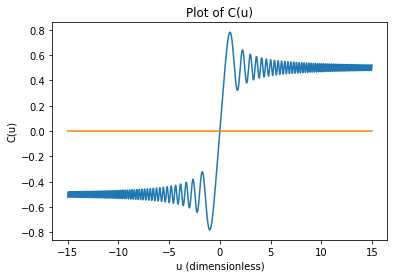

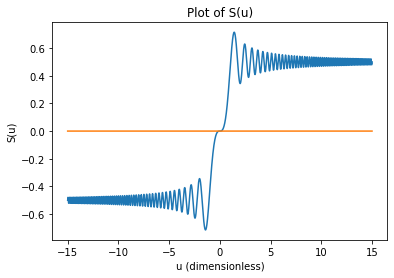

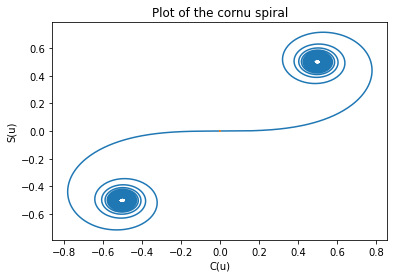

In [127]:
#Space over which we will integrate
space = np.linspace(-15.0, 15.0, 3000)

#Defining the integrands
cosine = lambda x: np.cos(np.pi*x**2/2.0)
sine = lambda x: np.sin(np.pi*x**2/2.0)

#Evaluate the integrals
C = [sp.integrate.quad(cosine, 0.0, x) for x in space]
S = [sp.integrate.quad(sine, 0.0, x) for x in space]

#plots
fig, ax2 = plt.subplots()
ax2.plot(space, C)
ax2.set_xlabel("u (dimensionless)")
ax2.set_ylabel("C(u)")
ax2.set_title("Plot of C(u)")

fig, ax2 = plt.subplots()
ax2.plot(space, S)
ax2.set_xlabel("u (dimensionless)")
ax2.set_ylabel("S(u)")
ax2.set_title("Plot of S(u)")

fig, ax2 = plt.subplots()
ax2.plot(C, S)
ax2.set_xlabel("C(u)")
ax2.set_ylabel("S(u)")
ax2.set_title("Plot of the cornu spiral")




  
  

Using quadrature integrals and defining C(u) and S(u) we defined ploted the Cornu spiral